In [4]:
import pandas as pd
from matplotlib import pyplot as plt
import sklearn.datasets

def get_iris_df():
    ds = sklearn.datasets.load_iris()
    df = pd.DataFrame(ds['data'],columns=ds['feature_names'])
    code_species_map = dict(zip(range(3), ds['target_names']))
    df['species'] = [code_species_map[c] for c in ds['target']]
    return df

In [5]:
df = get_iris_df()

In [3]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# decision tree

> 특정 기준(질문)에 따라 데이터를 구분하는 모델


결정 트리를 학습하는 방법은 다음과 같습니다.

1. 데이터를 보고 분류를 잘하는 최적의 특징값과 기준을 찾아냅니다.
2. 분류가 잘되었는지 평가하는 방법은 다양합니다. 가장 흔히 사용하는 방법은 정보 이득과 지니 불순도입니다.
3. 이렇게 찾아낸 최적의 특징값과 기준은 결정 트리의 최상위 노드가 됩니다.
4. 이 작업을 계속 반복해 데이터를 나눕니다.
5. 더 이상 데이터를 나눌 필요가 없어지거나 미리 정해놓은 트리의 높이에 도달하면 멈춥니다. 각 단말 노드에 있는 데이터 분포가 해당 노드의 확률분포가 됩니다. 예를 들어 잎사귀 노드에 범주 1의 데이터가 30개, 범주 2의 데이터가 20개 있다면 범주가 1/2일 확률을 각각 60%, 40%로 계산합니다.

- 결정 트리의 구체적인 학습 방법을 알아 두면 과적합과 같은 문제에 대처하는 데 도움이 됩니다.
- 예를 들어 트리의 최대 높이를 너무 크게 설정하면 잎사귀 노드마다 아주 적은 데이터 표본만 포함하게 됩니다. 결과적으로 100%에 가까운 예측 확률을 얻게 되는데 실제로 정확도가 올라간 것이 아니라 과적합이 일어난 겁니다.
- 라이브러리의 기본 설정을 그대로 사용하면 이런 문제가 흔히 발생하기 때문에 세부 매개변수를 조절하려면 학습 원리를 알고 있어야 합니다.

`과적합 : 머신러닝 모델이 학습 데이터에 너무 치우쳐서 일반화하지 못하게 된 것`

```python
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=5)
clf.fit(train[indep_cols],train.breed)
predictions = clf.predict(test[indep_cols])
```

In [4]:
from sklearn.tree import DecisionTreeClassifier   
from sklearn.datasets import load_iris    
from sklearn.model_selection import train_test_split

In [5]:
# Load iris data

iris_data=load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.2, random_state=24)

In [6]:
# Create DecisionTreeClassifier
clf= DecisionTreeClassifier(max_depth=5) 

In [7]:
# Train clf
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [8]:
print("훈련 세트 정확도: {:.3f}".format(clf.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(clf.score(X_test, y_test)))

훈련 세트 정확도: 0.992
테스트 세트 정확도: 0.967


# random forest

> 각기 다른 학습 데이터를 이용해 학습한 결정 트리를 모아놓은 분류기

- 가지고 있는 데이터를 무작위로 나눠서 결정 트리 여러 개를 학습시킵니다.
- 예측은 여러 결정 트리의 평균 예측값을 사용합니다.
- 앙상블 분류기의 좋은 예입니다.

`앙상블 분류기 : 분류기 여러 개를 학습시키고 그 결과를 합쳐서 예측값을 정하는 분류 방법`

이 방법은 결정 트리 여러 개가 서로 다른 특징을 찾아내고 결정 트리의 의견을 많이 모아서 다수결을 따르면 잘 작동할 것이라고 가정합니다.
설령 과적합이 발생하더라도 트리마다 다른 과적합이 일어나는데 이것 역시 여러 트리를 모으면 상쇄된다는 원리입니다.

### 단점
- 결정트리의 단점과 비슷합니다. 학습된 랜덤 포레스트 분류기로 데이터에 대한 통찰을 얻기가 매우 어렵습니다.
- 특징값의 중요성을 쉽게 계산할 수 있지만 특징값이 데이터에서 정확히 어떤 의미를 지니는지 파악이 어렵습니다.

```python
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(
    max_depth=5,n_estimators=10,
    max_features=1)
clf.fit(train[indep_cols], train.breed)
predictions = clf.predict(test[indep_cols])
```

Parameter (Python의 sklearn 라이브러리 기준)

- N-estimator : 랜덤포레스트 안에 만들어지는 의사결정나무 갯수. 트리가 많아지면 속도가 느려지고 너무 트리가 크면 오히려 정확도가 낮아진다. 그러나 일반적으론 트리가 많아질수록 분류를 잘하게 되므로 적절한 trade-off 필요하다.

- Max-depth : 랜덤포레스트 안에 있는 각 의사결정나무의 깊이를 설정. 트리가 깊어질수록 더 잘게 분류를 시키므로 일반적으론 정확도가 높아진다.

- Min-samples-split : 내부 노드에 데이터를 얼마 만큼씩 최소한 넣을 것인가 설정. 10%~100%로 설정. 100%로 갈수록 underffiting이 일어나서 정확도가 낮아진다. 

- Min-samples-leaf : 리프 노드에 데이터를 얼마 만큼씩 최소한 넣을 것인가 설정. 10%~100%로 설정. 100%로 갈수록 underffiting이 일어나서 정확도가 낮아진다.

- Max-feature : 가장 잘 분류할 feature의 갯수를 설정. 

In [30]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [31]:
# Load iris data

iris_data=load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.2, random_state=24)

In [32]:
forest = RandomForestClassifier(
    max_depth=5, n_estimators=10,
    max_features=1)
forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, max_features=1, n_estimators=10)

In [33]:
print("훈련 세트 정확도: {:.3f}".format(forest.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(forest.score(X_test, y_test)))

훈련 세트 정확도: 0.992
테스트 세트 정확도: 0.967


# logistic regression

> 데이터가 어떤 범주에 속할 확률을 0에서 1 사이의 값으로 예측하고 그 확률에 따라 가능성이 더 높은 범주에 속하는 것으로 분류해주는 지도 학습 알고리즘

- 초평면과 데이터 표본의 거리를 이용해 각 범주에 속할 확률을 구하는 분류기
- 초평면이 데이터를 잘 분류한다면, 즉 거의 선형 구분이 가능한 상황이라면 초평면에서 멀리 떨어져 있는 데이터 표본은 높은 신뢰도로 거의 0이나 1에 가까운 값으로 예측됩니다. 
- 반대로 데이터가 마구 섞여 있어서 구분이 어렵다면 대부분의 데이터 예측값의 신뢰도가 낮아집니다.

## 시그모이드 함수
- 확률을 0에서 1사이로 커브 모양으로 나타내야 하는데, 이걸 가능하게 해주는 게 바로 Sigmoid 함수입니다.

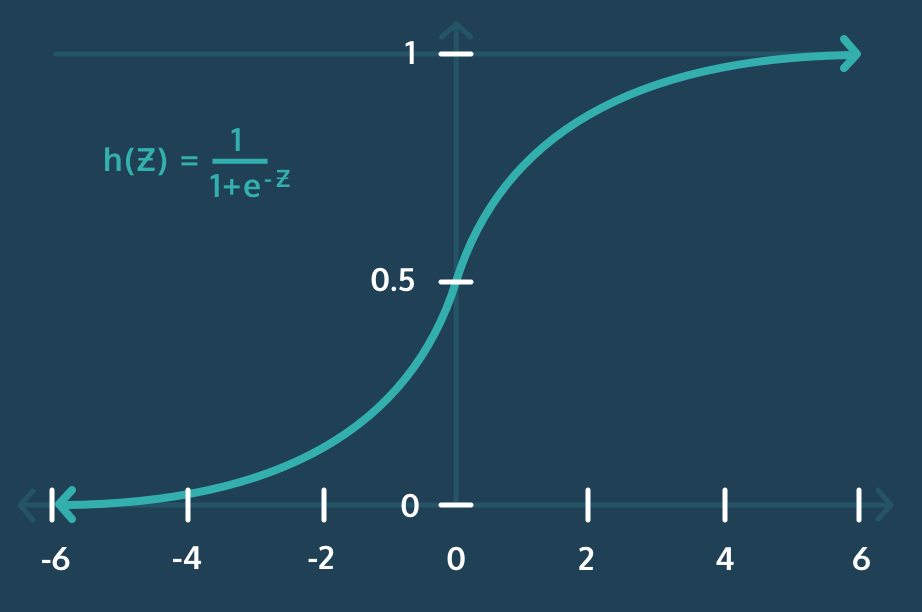

```python
from sklearn import linear_model
clf = linear_model.LogisticRegression()
clf.fit(train_data,train_labels)
predictions = clf.predict(test_data)
```